In [1]:
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def dataCSV():
    
    with open('influencers.csv') as csv_file:
        data = csv.reader(csv_file)
        a = 0
        big_array = []
        for row in data:
            if a != 0:    
                big_array.append([int(row[0]),int(row[1]),float(row[2])])
            a += 1
    return big_array

#def dataCSV():
#    with open('influencers.csv') as csv_file:
#       data_influencers = csv.reader(csv_file, delimiter=',')
#        line_count = 0
 #       for row in data_influencers:
  #          if line_count == 0:
  #              line_count += 1
 #           else:
 #               di = np.append(di, [[row[0], row[1], row[2]]], axis=0)
#               line_count += 1
#   return (big_array)

In [3]:
def followers_accept(wir):
    #wir = data
    #LOW
    o = 8000
    p = 4000
    if wir > o :
        l = 1
    elif wir <=p:
        l = 0
    elif (wir <=o) and (wir > p):
        x = wir - p
        y = o - p
        l = x/y



    #avg
    r = 40000
    t = 31000
    if wir > r:
        a = 1
    elif wir <=t:
        a = 0
    elif (wir <=r) and (wir > t):
        x = wir - t
        y = r - t
        a = x/y



    #high
    q = 80000
    w = 61000
    if wir > q:
        h = 1
    elif wir <=w:
        h = 0
    elif (wir <=q) and (wir > w):
        x = wir - w
        y = q - w
        h = x/y

    return [l,a,h]
    
    #LOW 
    #if x <= 10000:
    #    return 1
    #elif x >= 25000:
    #    return 0
    #else:
    #   return (25000 - x) / (25000 - 10000)

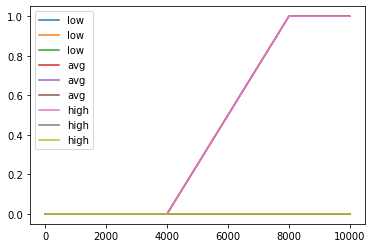

In [4]:
# grafik_followes
x = np.arange(0, 10000,1)
plt.plot(x, [followers_accept(l) for l in x], label="low")
plt.plot(x, [followers_accept(a) for a in x], label="avg")
plt.plot(x, [followers_accept(h) for h in x], label="high")
plt.legend()

In [5]:
def engagment_accept(wir):
#wir = data
    #low
    o = 5
    p = 1.5
    
    if wir > o :
        l = 1
    elif wir <=p:
        l = 0
    elif (wir <=o) and (wir > p):
        x = wir - p
        y = o - p
        l = x/y
    

    #avg
    r = 9
    t = 6
    if wir > r :
        a = 1
    elif wir <=t:
        a = 0
    elif (wir <=r) and (wir > t):
        x = wir - t
        y = r - t
        a = x/y



    #high
    q = 8
    w = 15
    if wir > w :
        h = 1
    elif wir <=q:
        h = 0
    elif (wir <=w) and (wir > q):
        x = wir - q
        y = w - q
        h = x/y
        
    return [l,a,h]

#if 50000 <= x <= 70000:
#        return 1
#elif 35000 < x < 50000:
#        return (x - 35000) / (50000 - 35000)
#elif 70000 < x < 75000:
#        return (75000 - x) / (75000 - 70000)
#else:
#        return 0

#if 50000 <= x <= 70000:
#        return 1
#elif 35000 < x < 50000:
#        return (x - 35000) / (50000 - 35000)
#elif 70000 < x < 75000:
#        return (75000 - x) / (75000 - 70000)
#else:
#        return 0
# if 8  < w:
#h = 1
#elif 15 < x >= 8 and 8 > x:
#    h = 0
#elif (wir <= x and 10 > wir)
#    x = wir - h
#    y = w -q
#    h = x/y

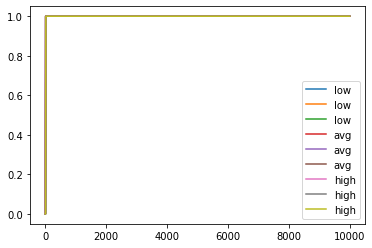

In [6]:
# grafik_followes
x = np.arange(0, 10000,1)
plt.plot(x, [engagment_accept(l) for l in x], label="low")
plt.plot(x, [engagment_accept(a) for a in x], label="avg")
plt.plot(x, [engagment_accept(h) for h in x], label="high")
plt.legend()

In [7]:
def inferensi_hu(followers,engagment):
    hu1 = min(followers[0],engagment[2])
    hu2 = min(followers[1],engagment[2])
    hu3 = min(followers[2],engagment[2])
    hasilinferensi = max([hu1,hu2,hu3])
    return hasilinferensi

def inferensi_ha(followers,engagment):
    ha1 = min(followers[0],engagment[0])
    ha2 = min(followers[0],engagment[1])
    ha3 = min(followers[1],engagment[0])
    hasilinferensi = max([ha1,ha2,ha3])
    return hasilinferensi

def inferensi_hi(followers,engagment):
    hi1 = min(followers[1],engagment[1])
    hi2 = min(followers[2],engagment[1])
    hi3 = min(followers[2],engagment[0])
    hasilinferensi = max([hi1,hi2,hi3])
    return hasilinferensi

In [8]:
def defuzzyfikasi(ha,hi,hu):
    a = (ha*70) + (hi*50) + (hu*100)
    b = ha + hi + hu
    return a/(b+0.00001)

In [9]:
def mergefunc(data):
    fac = followers_accept(data[1])
    engac = engagment_accept(data[2])
    ha = inferensi_ha(fac,engac)
    hi = inferensi_hi(fac,engac)
    hu = inferensi_hu(fac,engac)
    defuz = defuzzyfikasi(ha,hi,hu)
    return defuz

In [10]:
def mengambil_defuz(data):
    data_defuz = []
    for i in data :
        x = mergefunc(i)
        data_defuz.append(x)
    return data_defuz   

In [11]:
def printdata(data,defuzz):
    for x in range(len(data)) :
        print("data ke ",x+1, " = ",data[x])
        print("defuzzz = ", defuzz[x])
        
        print()

In [12]:
def kembalikanarray(x):
    revs = []
    for i in reversed(x):
        revs.append(i)
    return revs

In [13]:
def duapuluhbesar(defz):
    arr =  sorted(range(len(defz)), key=lambda k: defz[k])
    arr2 = kembalikanarray(arr)[:20]

    for i in range(len(arr2)):
        arr2[i]+=1
    
    return arr2

In [14]:
data = dataCSV()
defzz = mengambil_defuz(data)

printdata(data,defzz)
hasil20 = duapuluhbesar(defzz)
print ("20 Besar yang terbaik yaitu data : ",hasil20)


data ke  1  =  [1, 6207, 1.0]
defuzzz =  0.0

data ke  2  =  [2, 38237, 5.8]
defuzzz =  69.99930000699993

data ke  3  =  [3, 14840, 0.6]
defuzzz =  0.0

data ke  4  =  [4, 43851, 1.4]
defuzzz =  0.0

data ke  5  =  [5, 15530, 3.5]
defuzzz =  69.99877502143714

data ke  6  =  [6, 24050, 3.3]
defuzzz =  69.99863891535443

data ke  7  =  [7, 44837, 1.3]
defuzzz =  0.0

data ke  8  =  [8, 10029, 3.4]
defuzzz =  69.99871055006882

data ke  9  =  [9, 14531, 0.2]
defuzzz =  0.0

data ke  10  =  [10, 7862, 2.8]
defuzzz =  69.99811543535365

data ke  11  =  [11, 95117, 6.6]
defuzzz =  59.99970000149999

data ke  12  =  [12, 28548, 2.5]
defuzzz =  69.997550085747

data ke  13  =  [13, 90773, 6.7]
defuzzz =  59.99970000149999

data ke  14  =  [14, 34711, 1.8]
defuzzz =  69.99183428599997

data ke  15  =  [15, 11546, 2.4]
defuzzz =  69.99727788363786

data ke  16  =  [16, 38046, 0.9]
defuzzz =  0.0

data ke  17  =  [17, 17006, 0.9]
defuzzz =  0.0

data ke  18  =  [18, 22159, 1.0]
defuzzz =  0.0

